CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 3 index: effectiveness, popularity, and complexity. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [6]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())


   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences, the index summarizes both the empirical results and theoretical underpinnings of each opening.

Popularity Metrics:
    Num Games: Indicates how frequently the opening is used.
    Last Played: Recent use can indicate current trends.
Performance Metrics:
    Perf Rating and Avg Player Rating: Reflect the average success and skill level associated with the openings.
    Player Win %, Draw %, Opponent Win %: Direct outcomes when the opening is used.
Strategic Complexity:
    Moves and Moves List: The length and complexity of the opening moves can indicate strategic depth.

In [7]:
# Imputation of Missing Data if needed

# Check for missing values
print(df.isnull().sum())


Unnamed: 0          0
Opening             0
Colour              0
Num Games           0
ECO                 0
Last Played         0
Perf Rating         0
Avg Player          0
Player Win %        0
Draw %              0
Opponent Win %      0
Moves               0
moves_list          0
move1w              0
move1b             15
move2w             70
move2b            140
move3w            256
move3b            383
move4w            544
move4b            698
White_win%          0
Black_win%          0
White_odds          0
White_Wins          0
Black_Wins          0
dtype: int64


We can see that some data is missing but this it's bacause not every opening have 4 moves, so we can't have the same number of data for every opening. We don't need to infer data.

looking for correlation

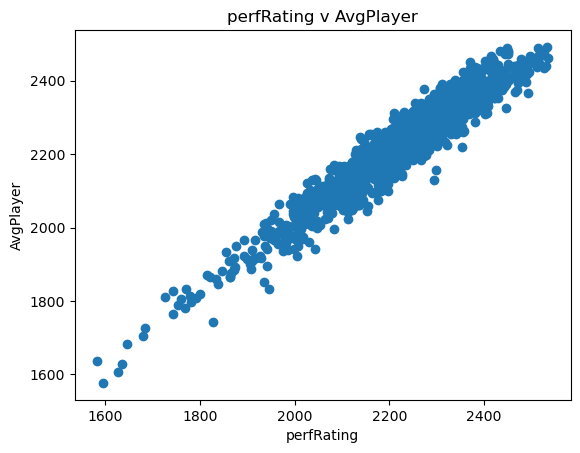

In [4]:
from matplotlib import pyplot as plt
import numpy as np

plt.title("perfRating v AvgPlayer")
plt.xlabel("perfRating")
plt.ylabel("AvgPlayer")
plt.scatter(df['Perf Rating'], df['Avg Player'])
plt.show()

The average rating seems to be correlated with the performance rating, I will use the performance rating as the effectiveness index and remove the average rating to avoid multicollinearity.